# TP 2 - Reinforcement Learning (December 1st)

In this assignement, we will focus on the MultiArmed Bandits problem.
You will implement:


- UCB1 https://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf

- Besa https://hal.archives-ouvertes.fr/hal-01025651v1/document

- Softmax https://www.cs.mcgill.ca/~vkules/bandits.pdf

- Thompson Sampling Agent https://en.wikipedia.org/wiki/Thompson_sampling

- KL UCB https://hal.archives-ouvertes.fr/hal-00738209v2 (optional)

![image not found:](multiarmedbandit.jpg "Bandits")

You will be evaluated on:
* Implementation of the 6 agents (but KL-UCB optional). Bonus points will be given to clean, scalable code.
* Answering this question -> for each implemented agent, give 1 pros and 1 cons ?

Send this notebook in a html format to cyriaque.rousselot(at)inria(dot)fr before December 8.

Good Luck !

You have to run those cells, you don't need to modify them

## Example : Random Agent and Epsilon Greedy Agent


In `choose`, prescribe how the agent selects its
actions (interact must return an action, that is
an index in [0, ..., 9]).

In `update`, implement how the agent updates
its buffers, using the newly observed `action` and `reward`.

In [28]:
import runner,environment
import numpy as np
from matplotlib import pyplot as plt

### Agent Definition

In [17]:
class RandomAgent:
    def __init__(self,n_a):
        self.n_a = n_a # number of possible actions
        """Init a new agent.
        """

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        return np.random.randint(0, self.n_a)

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        pass



In [18]:
class epsGreedyAgent:
    def __init__(self,n_a):
        self.n_a = n_a # number of possible actions
        self.A = range(n_a)
        self.mu = {a:[] for a in self.A} # a dictionary / key: action value: list of previous rewards
        self.epsilon = 0.1

    def choose(self): # how to choose the next action 
        """Acts in the environment.

        returns the chosen action.
        """
        for a in self.A:
            if len(self.mu[a])==0:
                return a  #try everyone more than once
        if np.random.uniform(0,1) >self.epsilon:
            return np.argmax([np.mean(self.mu[a]) for a in self.A]) # expectation of the previous rewards
        else: 
            return np.random.randint(0,self.n_a)

    def update(self, action, reward): # how to choose the env after geting the reward
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[action].append(reward)
       


### Agent Evaluation

Simulation step 1:
 ->            action: 3
 ->            reward: 0.27080140354724425
 -> cumulative reward: 0.27080140354724425
Simulation step 2:
 ->            action: 2
 ->            reward: 0.361740947042311
 -> cumulative reward: 0.6325423505895553
Simulation step 3:
 ->            action: 2
 ->            reward: 0.361740947042311
 -> cumulative reward: 0.9942832976318663
Simulation step 4:
 ->            action: 4
 ->            reward: 0.16015765772274165
 -> cumulative reward: 1.154440955354608
Simulation step 5:
 ->            action: 6
 ->            reward: -0.003912490573487016
 -> cumulative reward: 1.150528464781121
Obtained a final reward of 1.150528464781121


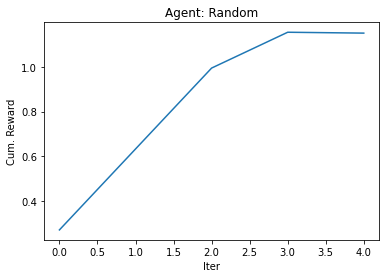

In [6]:
# Looping on a single environement and a single agent
niter = 5
n_actions = 10 # 10 bandits 
my_agent = RandomAgent(n_actions)
my_env = environment.Environment(n_actions)
my_runner = runner.Runner(my_env,my_agent,verbose=True) # The verbose parameter allows displaying every step
final_reward, list_cumul = my_runner.loop(niter)
print("Obtained a final reward of {}".format(final_reward))

from matplotlib import pyplot as plt
plt.plot(list_cumul)
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("Agent: Random")
plt.show()

In [21]:
# Running a batched simulation with n_agents agents in parallel

niter = 1000
n_agents = 10
n_actions = 10

my_runner = runner.BatchRunner(environment.Environment, RandomAgent, n_agents,n_actions, False)
final_reward_rd, list_cumul_rd = my_runner.loop(niter)
print("Random Agent obtained a final average reward of {}".format(final_reward_rd))

my_runner = runner.BatchRunner(environment.Environment, epsGreedyAgent, n_agents,n_actions, False)
final_reward_eg, list_cumul_eg = my_runner.loop(niter)
print("Epsilon Greedy Agent obtained a final average reward of {}".format(final_reward_eg))

Random Agent obtained a final average reward of -44.69518266962911
Epsilon Greedy Agent obtained a final average reward of 1721.4091166323594


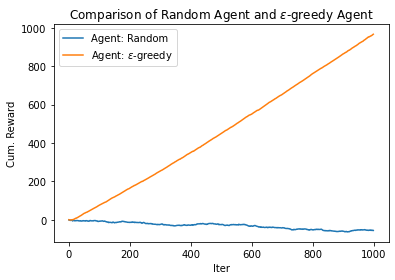

In [12]:
from matplotlib import pyplot as plt

plt.plot(list_cumul_rd,label="Agent: Random")
plt.plot(list_cumul_eg,label="Agent: $\epsilon$-greedy")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("Comparison of Random Agent and $\epsilon$-greedy Agent")
plt.legend()
plt.show()

You can play with the complexity of the environment by modifying the number of possible actions. I suggest that you begin with 10 possible actions

In [35]:
# Running a batched simulation with n_agents agents in parallel

niter = 1000
n_agents = 10
n_actions = 800

my_runner = runner.BatchRunner(environment.Environment, RandomAgent, n_agents,n_actions, False)
final_reward_rd, list_cumul_rd = my_runner.loop(niter)
print("Random Agent obtained a final average reward of {}".format(final_reward_rd))

my_runner = runner.BatchRunner(environment.Environment, epsGreedyAgent, n_agents,n_actions, False)
final_reward_eg, list_cumul_eg = my_runner.loop(niter)
print("Epsilon Greedy Agent obtained a final average reward of {}".format(final_reward_eg))

Random Agent obtained a final average reward of 6.563287047066329
Epsilon Greedy Agent obtained a final average reward of 1241.7238086226682


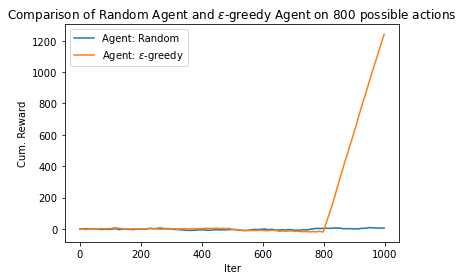

In [36]:
from matplotlib import pyplot as plt

plt.plot(list_cumul_rd,label="Agent: Random")
plt.plot(list_cumul_eg,label="Agent: $\epsilon$-greedy")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title(f"Comparison of Random Agent and $\epsilon$-greedy Agent on {n_actions} possible actions")
plt.legend()
plt.show()

## Your turn !

In [25]:
cumul_dict = {
    'RandomAgent' : list_cumul_rd,
    'epsGreedyAgent' : list_cumul_eg
}
N_ITER = 1000
N_AGENTS = 10
N_ACTIONS = 10

def test_agent(agent, niter = N_ITER, n_agents = N_AGENTS, n_actions = N_ACTIONS):
    agent_name = agent.__name__
    my_runner = runner.BatchRunner(environment.Environment, agent, n_agents,n_actions, False)
    final_reward, list_cumul = my_runner.loop(niter)
    print(f"{agent_name} obtained a final average reward of {final_reward}")
    cumul_dict[agent_name] = list_cumul
    for label, list_cumul in cumul_dict.items():
        plt.plot(list_cumul,label=label)
    plt.xlabel("Iter")
    plt.ylabel("Cum. Reward")
    plt.title(f"Comparison of Random Agent and $\epsilon$-greedy Agent and {agent_name} on {n_actions} possible actions")
    plt.legend()
    plt.show()

### UCB-1

In [29]:
class UCBAgent:
    # https://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf
    def __init__(self,n_a):
        self.n_a=n_a
        self.A = range(n_a)
        self.mu = {a:[] for a in self.A}
        self.t=0
        

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        
        for a in self.A:
            if len(self.mu[a])==0:
                return a 
     
            
        return np.argmax([np.mean(self.mu[a]) +np.sqrt((2*np.log10(self.t))/len(self.mu[a])) for a in self.A]) # expectation of the previous rewards
 

    def update(self, a, r):
        self.t+=1
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[a].append(r)
        

UCBAgent obtained a final average reward of 1777.281374701321


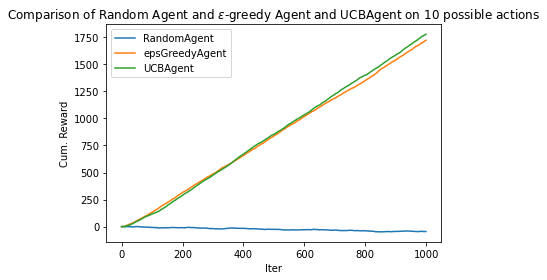

In [30]:
test_agent(UCBAgent)

### Boltzmann Exploration (Softmax) 

In [31]:
class SoftmaxAgent: # Chose a Temperature between 0.01 and 1
    # https://www.cs.mcgill.ca/~vkules/bandits.pdf
    def __init__(self,n_a):
        self.A = range(n_a)
        self.n_a=n_a
        self.mu = {a:[] for a in self.A}  
        self.tau=0.5
    

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        for a in self.A:
            if len(self.mu[a])==0:
                return a 
        
        z=sum([np.exp(np.mean(self.mu[a])/ self.tau) for a in self.A])
        probs = [np.exp(np.mean(self.mu[a])/ self.tau) / z for a in self.A]
        

        return np.random.choice(self.A,p=probs) # draw the action from the possibility distribution


    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[action].append(reward)

SoftmaxAgent obtained a final average reward of 1866.0861879068614


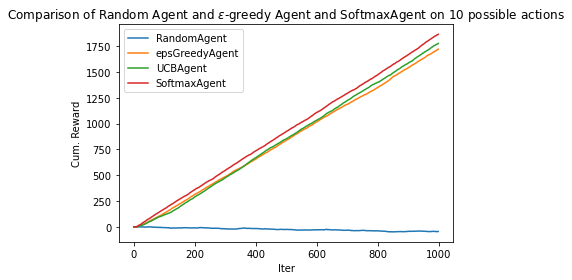

In [32]:
test_agent(SoftmaxAgent)

### BESA

In [35]:

class BesaAgent:
    # https://hal.archives-ouvertes.fr/file/index/docid/1025651/filename/BESA2.pdf
    def __init__(self,n_a):
        self.A = range(n_a)
        self.n_a=n_a
        self.mu = {a:[] for a in self.A}
   

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        for a in self.A:
            if len(self.mu[a])==0:
                return a 


        def besa(A):
            #base case
            if len(A) ==1: 
                return A[0]
            #recursive part 
            elif len(A)==2:
                a=A[0]
                b=A[1]
                na=len(self.mu[a])
                nb=len(self.mu[b])
                Ia = np.random.choice(range(na), size=min(na,nb), replace=False)
                Ib = np.random.choice(range(nb), size=min(na,nb), replace=False)

                ua=np.array(self.mu[a])[Ia].mean()
                ub=np.array(self.mu[b])[Ib].mean()

                if ua != ub:
                    return A[np.argmax([ua,ub])]
                else: 
                    return A[np.argmin([na,nb])]

            else: #dichotomic search binary search algorithm
                mid=len(A)//2
                left=besa(A[:mid]) # take the best action from the left side
                right=besa(A[mid:]) # take the best action from right
                return besa([left,right]) # concatenate two action 
        return besa(self.A)

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[action].append(reward)
        

BesaAgent obtained a final average reward of 1898.49359327968


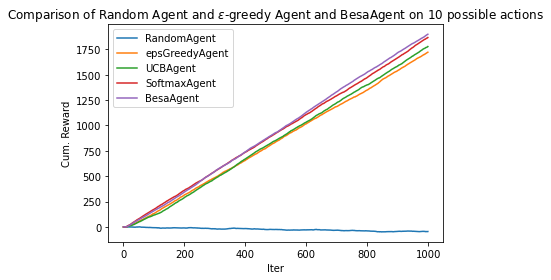

In [37]:
test_agent(BesaAgent)

### Thompson Sampling

A: The Thompson Sampling Algorithm  we try to implement follows this principle:
"Draw a possible model from the posterior distribution and act optimally in this sampled model"
Here we can consider a Gaussian Prior where $\mu_1,...,\mu_K$ are random variables following $\mu_i 	\sim \mathcal{N}([0,1])$ .

You need to build the corresponding posterior distribution and update it after knowledge of the reward.
The best action you consider is the best sampled value from your estimation of the posterior :

$\theta_i  \sim \text{Posterior}$ 
$a^* = \text{argmax}_{i}\theta_i$

In [42]:
import random 
class ThompsonAgent:
    # https://en.wikipedia.org/wiki/Thompson_sampling
    def __init__(self,n_a):
        self.A = range(n_a)
        self.n_a=n_a
        self.mu = {a:[0] for a in self.A} #we initialize the reward with 0 
        # we assume the prior as a normal distribution ~N(0,1)

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
          # Sample a random value from the beta distribution for each arm
        var=1/np.array([len(self.mu[a]) for a in self.A])
        mean=var*np.array([sum(self.mu[a]) for a in self.A])
        return np.random.normal(mean,var).argmax()

    def update(self, a, r):
        self.mu[a].append(r)
        

ThompsonAgent obtained a final average reward of 2351.777091958807


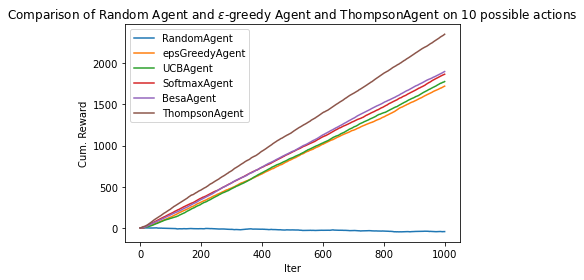

In [45]:
test_agent(ThompsonAgent)

### (OPTIONAL) KL-UCB

In [13]:
class KLUCBAgent:
    # See: https://hal.archives-ouvertes.fr/hal-00738209v2
    def __init__(self,n_a):
        self.A = range(n_a)
        self.n_a=n_a
        self.mu = {a:[] for a in self.A}

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        raise NotImplemented

    def update(self, a, r):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        raise NotImplemented